In [44]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

csv_path = "./CSV/"

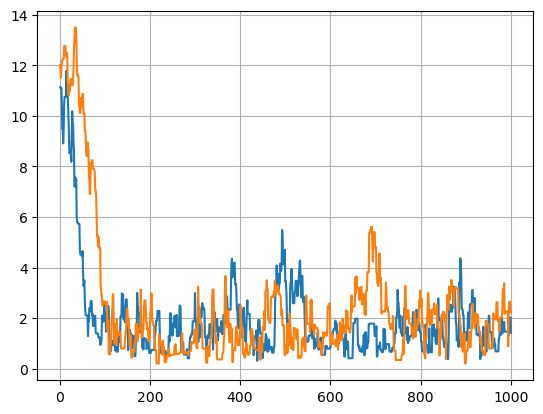

In [45]:
GS_eq = np.loadtxt(csv_path + "Ex5_1_GS_eq.csv", delimiter=",")
GS_eq_gauss = np.loadtxt(csv_path + "Ex5_1_GS_eq_gauss.csv", delimiter=",")

plt.plot(np.arange(1, np.size(GS_eq) + 1, 1), GS_eq)
plt.plot(np.arange(1, np.size(GS_eq_gauss) + 1, 1), GS_eq_gauss)
plt.grid(True)
plt.show()

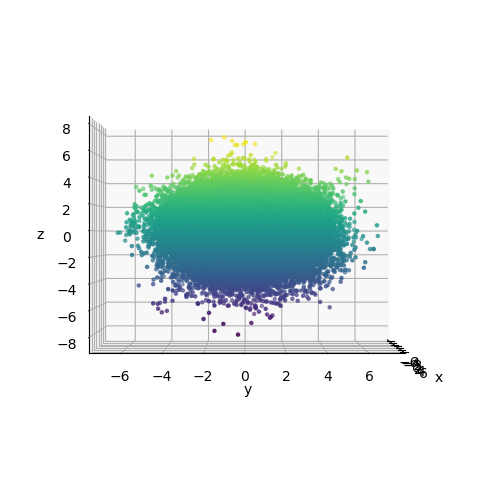

In [46]:
H_GS = np.loadtxt(csv_path + "Ex5_1_GS_pos.csv", delimiter=',')

X=H_GS[:,0]
Y=H_GS[:,1]
Z=H_GS[:,2]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 0)

plt.show()

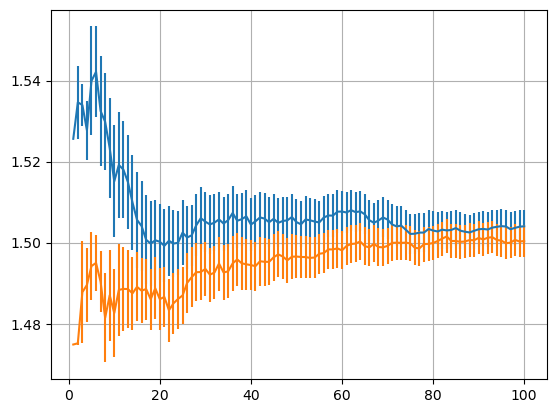

In [47]:
GS_r = np.loadtxt(csv_path + "Ex5_1_GS_r.csv", delimiter=",")
GS_r_gauss = np.loadtxt(csv_path + "Ex5_1_GS_r_gauss.csv", delimiter=",")

plt.errorbar(np.arange(1, np.size(GS_r[:,0]) + 1, 1), GS_r[:,0], yerr=GS_r[:,1])
plt.errorbar(np.arange(1, np.size(GS_r[:,0]) + 1, 1), GS_r_gauss[:,0], yerr=GS_r_gauss[:,1])
plt.grid(True)
plt.show()

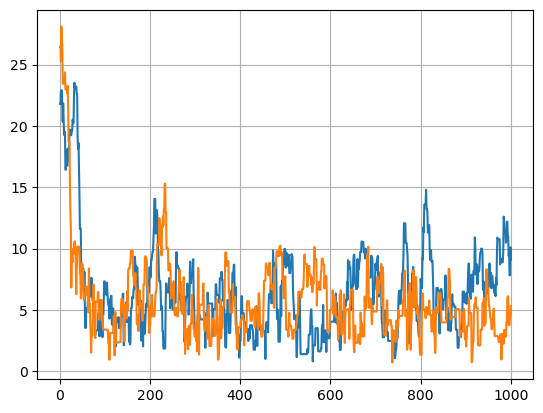

In [48]:
exc_eq = np.loadtxt(csv_path + "Ex5_1_2P_eq.csv", delimiter=",")
exc_eq_gauss = np.loadtxt(csv_path + "Ex5_1_2P_eq_gauss.csv", delimiter=",")

plt.plot(np.arange(1, np.size(exc_eq) + 1, 1), exc_eq)
plt.plot(np.arange(1, np.size(exc_eq_gauss) + 1, 1), exc_eq_gauss)
plt.grid(True)
plt.show()

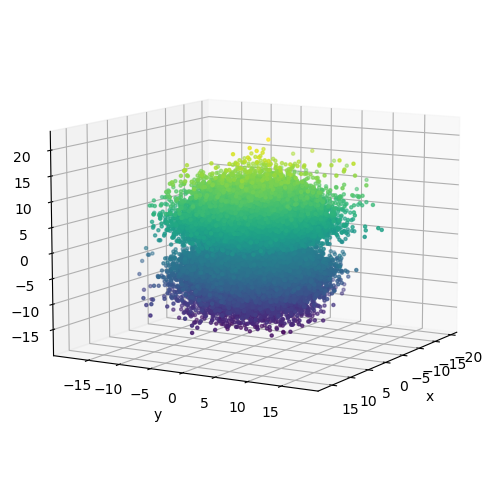

In [49]:
H_2P = np.loadtxt(csv_path + "Ex5_1_2P_pos.csv", delimiter=',')

X=H_2P[:,0]
Y=H_2P[:,1]
Z=H_2P[:,2]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()


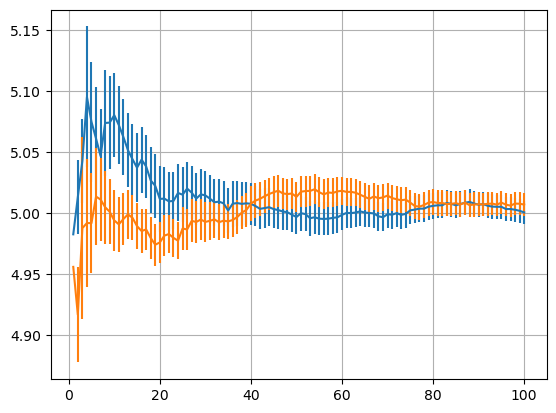

In [50]:
exc_r = np.loadtxt(csv_path + "Ex5_1_2P_r.csv", delimiter=",")
exc_r_gauss = np.loadtxt(csv_path + "Ex5_1_2P_r_gauss.csv", delimiter=",")

plt.errorbar(np.arange(1, np.size(exc_r[:,0]) + 1, 1), exc_r[:,0], yerr=exc_r[:,1])
plt.errorbar(np.arange(1, np.size(exc_r[:,0]) + 1, 1), exc_r_gauss[:,0], yerr=exc_r_gauss[:,1])
plt.grid(True)
plt.show()

Number of steps per block should be greater than equilibration steps (1000 is more thean enough, equilibration approx after 100 steps)